# LAB 1B

Cable1 = no7, l = 2964 mm

Cable2 = no2, l = 3234 mm

Cable3 = no5, l = 3983 mm

### Package Import Block

In [73]:
import pandas as pd
import numpy as np
import math
import plotly.graph_objects as go
import skrf as rf
import matplotlib.pyplot as plt
import seaborn as sns


### Plotting Measured Data

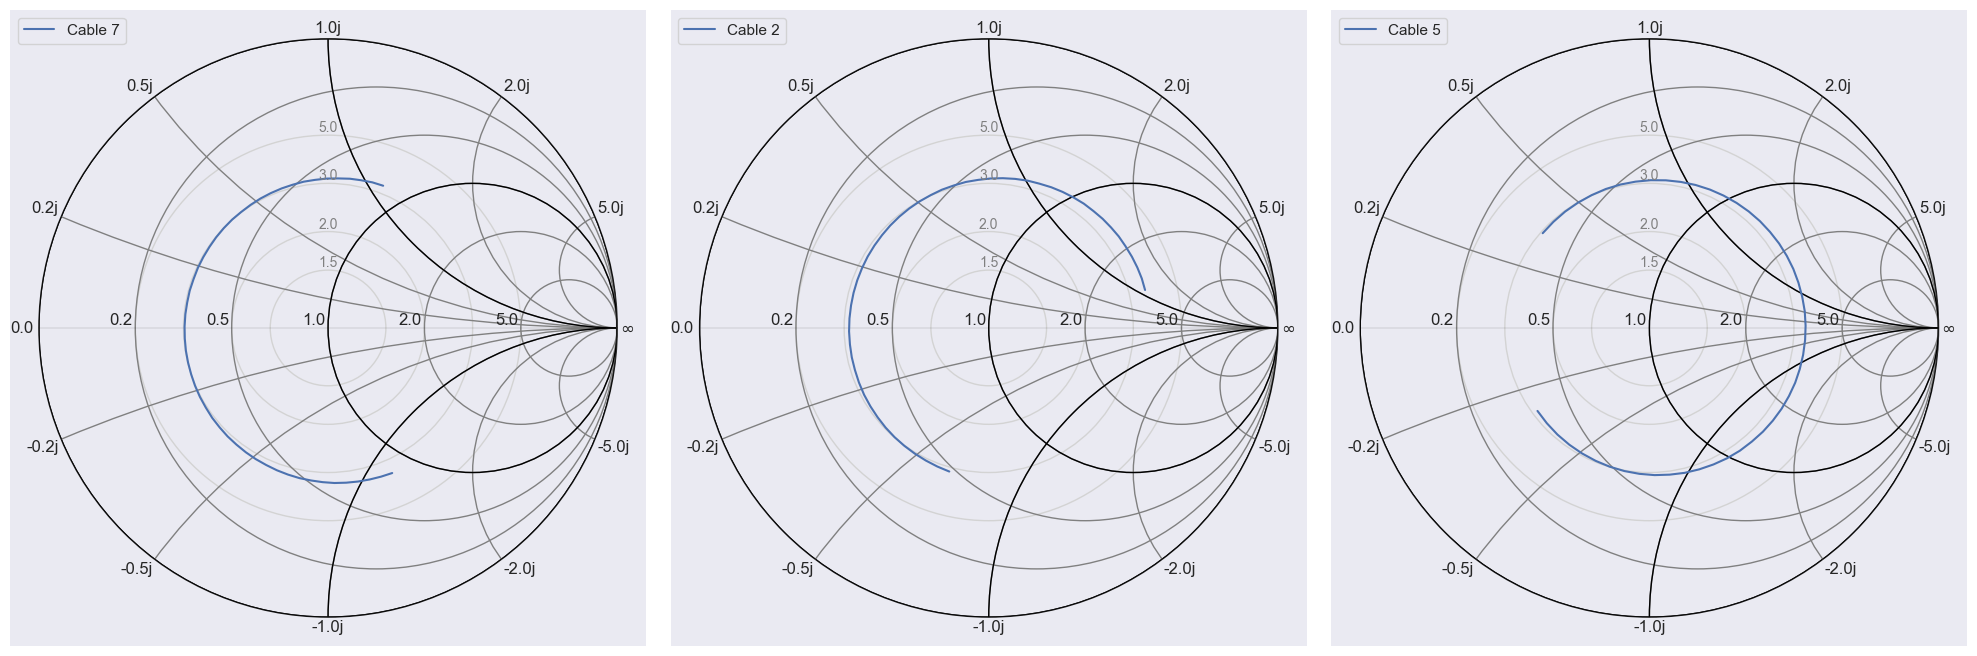

In [74]:
sns.set_theme()

cable1 = rf.Network('Cable_1_data.s1p')
cable2 = rf.Network('Cable_2_data.s1p')
cable3 = rf.Network('Cable_3_data.s1p')

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(131); ax1.grid()
ax2 = fig.add_subplot(132); ax2.grid()
ax3 = fig.add_subplot(133); ax3.grid()

cable1.plot_s_smith( 
                r=1,
                chart_type='z',
                ax=ax1,
                label='Cable 7',
                show_legend=True,
                draw_labels=True,
                draw_vswr=True)

cable2.plot_s_smith(
                r=1,
                chart_type='z',
                ax=ax2,
                label='Cable 2',
                show_legend=True,
                draw_labels=True,
                draw_vswr=True)

cable3.plot_s_smith(
                r=1,
                chart_type='z',
                ax=ax3,
                label='Cable 5',
                show_legend=True,
                draw_labels=True,
                draw_vswr=True)
fig.tight_layout()

### Theoretical Network Functions

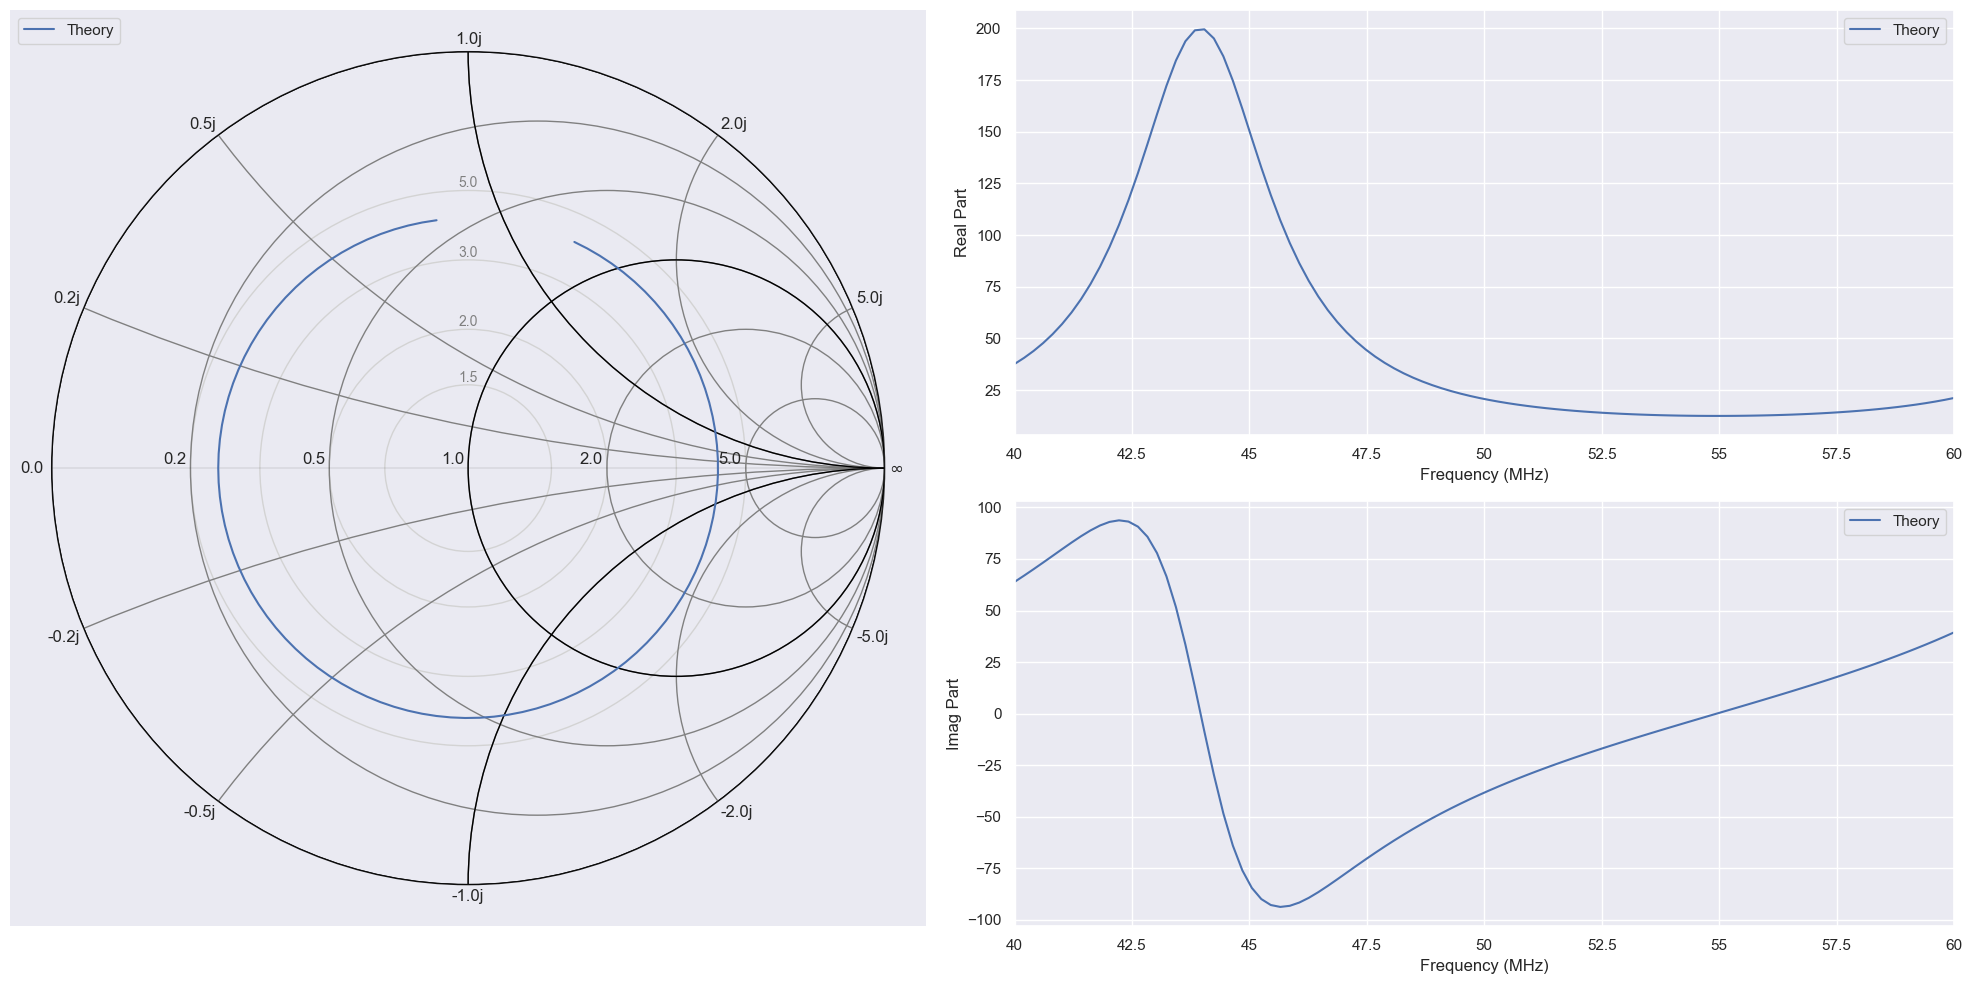

In [75]:
# Creates RF network based on electrical length and dielectric constant
def theoretical_network (pts, e_r, l, Z_L, Z_0):
    data = {'Frequency (MHz)':np.linspace(40,60,num=pts)}
    gammaIn = pd.DataFrame(data=data)

    # Calculate electrical length
    gammaIn['bl'] = ((2*np.pi*gammaIn['Frequency (MHz)']*(10**6))/(3*(10**8))) * math.sqrt(e_r) * l

    # Calculate Load reflection coefficient
    gammaL = (Z_L - Z_0)/(Z_L + Z_0)
    
    # Calculate Input reflection coefficient 
    gammaIn['Gamma_In'] = gammaL * np.exp(-2j * gammaIn['bl'])

    # Create network
    freq = rf.Frequency(40, 60, pts, 'mhz')
    ntwk = rf.Network(frequency=freq, s=gammaIn['Gamma_In'], name='Theory')
    
    return ntwk

example = theoretical_network(100, 2.3, 4.5, 200, 50)

gs_kw=dict(width_ratios=[1,1], height_ratios=[1,1])

fig, axs = plt.subplot_mosaic([['left', 'upper right'],
                                ['left', 'lower right']],
                               gridspec_kw=gs_kw,
                               figsize=(20,10),
                               layout="tight" 
)

example.plot_s_smith( 
                r=1,
                chart_type='z',
                ax=axs['left'],
                label='Theory',
                show_legend=True,
                draw_labels=True,
                draw_vswr=True)

example.plot_z_re(
                ax=axs['upper right'],
                label='Theory'
)


example.plot_z_im(
                ax=axs['lower right'],
                label='Theory'
)

In [76]:
# Create theoretical networks
cable1Theory = theoretical_network(100, 2.3, 2.964, 200, 50)
cable2Theory = theoretical_network(100, 2.3, 3.234, 200, 50)
cable3Theory = theoretical_network(100, 2.3, 3.983, 200, 50)

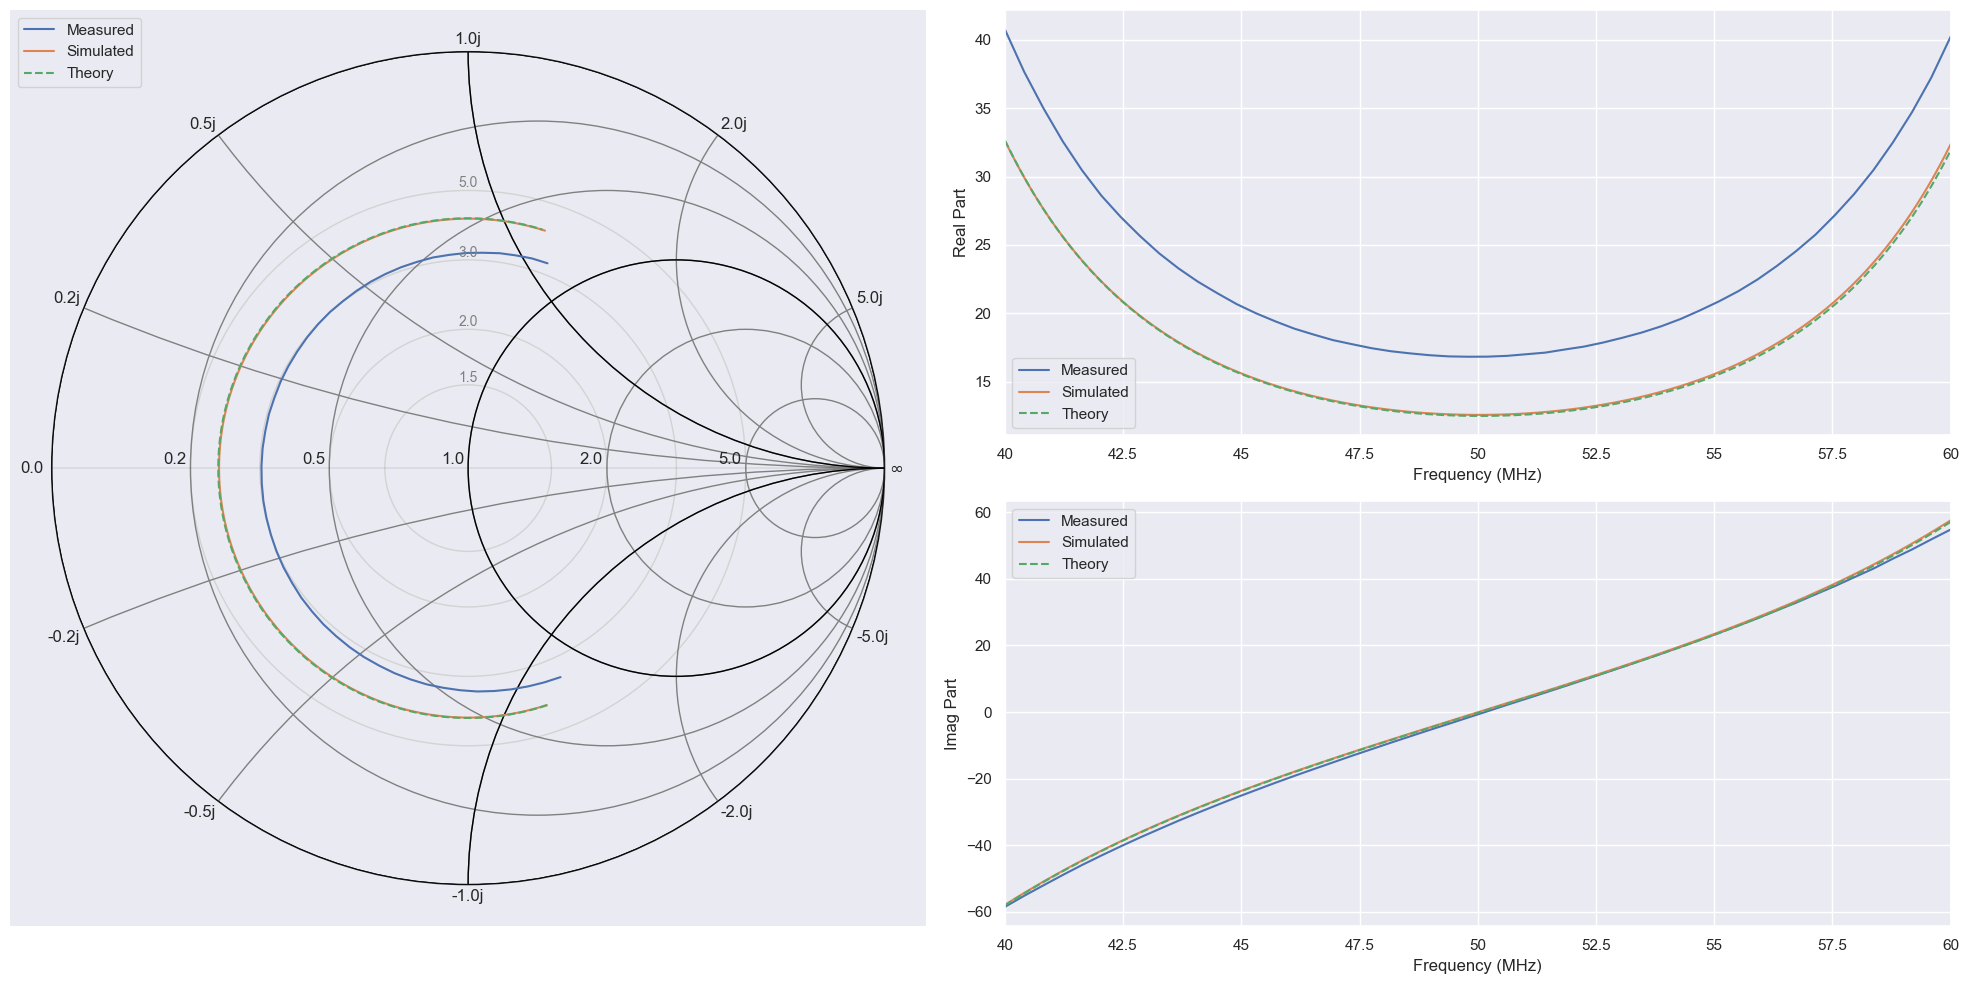

In [77]:
cable1 = rf.Network('Cable_1_data.s1p')
cable1Sim = rf.Network('sim/cabl1sim.s1p')
sns.set_theme()

gs_kw=dict(width_ratios=[1,1], height_ratios=[1,1])

fig, axs = plt.subplot_mosaic([['left', 'upper right'],
                                ['left', 'lower right']],
                               gridspec_kw=gs_kw,
                               figsize=(20,10),
                               layout="tight"
    
)

cable1.plot_s_smith( 
                r=1,
                chart_type='z',
                label='Measured',
                ax=axs['left'],
                show_legend=True,
                draw_labels=True,
                draw_vswr=True)

cable1Sim.plot_s_smith( 
                r=1,
                chart_type='z',
                label='Simulated',
                ax=axs['left'],
                show_legend=True,
                draw_labels=True,
                draw_vswr=True)

cable1Theory.plot_s_smith( 
                r=1,
                chart_type='z',
                linestyle= '--',
                label='Theory',
                ax=axs['left'],
                show_legend=True,
                draw_labels=True,
                draw_vswr=True)

cable1.plot_z_re(
                ax=axs['upper right'],
                label='Measured'
)

cable1Sim.plot_z_re(
                ax=axs['upper right'],
                label='Simulated'
)

cable1Theory.plot_z_re(
                ax=axs['upper right'],
                linestyle= '--',
                label='Theory'
)

cable1.plot_z_im(
                ax=axs['lower right'],
                label='Measured'
)

cable1Sim.plot_z_im(
                ax=axs['lower right'],
                label='Simulated'
)

cable1Theory.plot_z_im(
                ax=axs['lower right'],
                linestyle= '--',
                label='Theory'
)
plt.show()

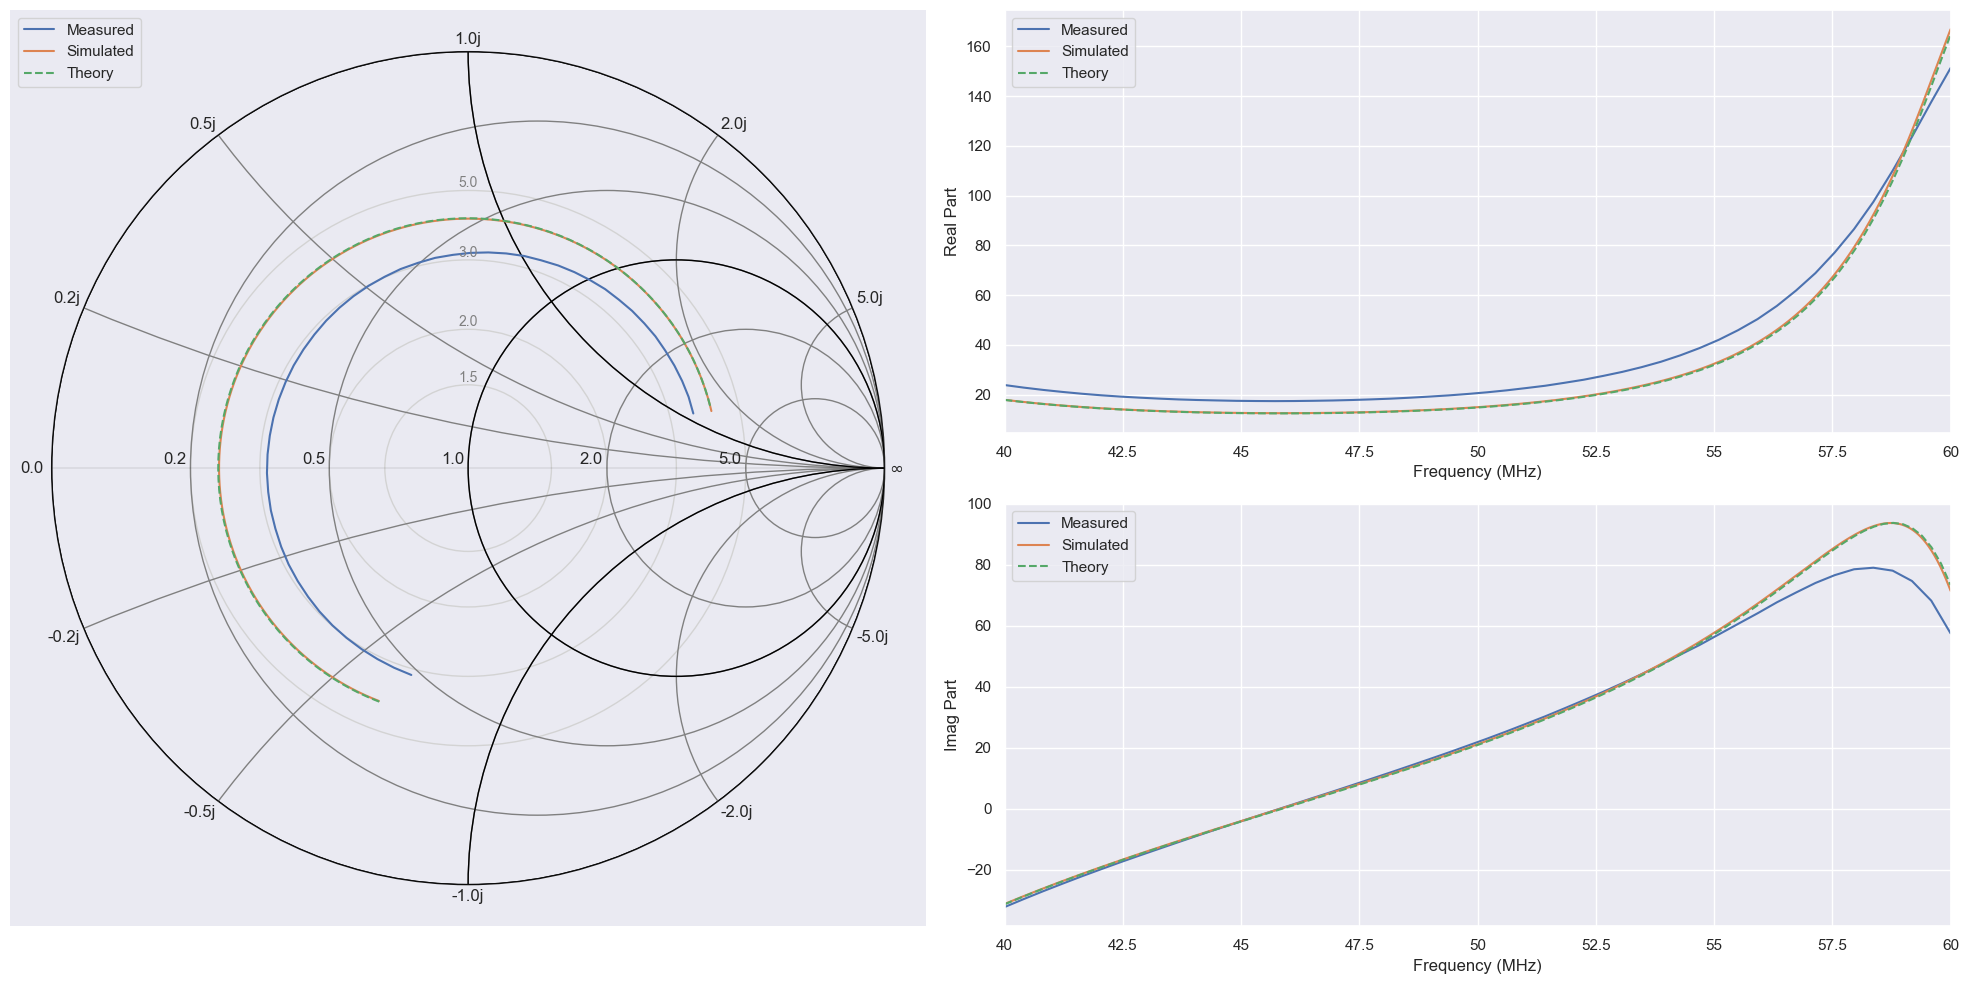

In [82]:
cable2 = rf.Network('Cable_2_data.s1p')
cable2Sim = rf.Network('sim/cabl2sim.s1p')
sns.set_theme()

gs_kw=dict(width_ratios=[1,1], height_ratios=[1,1])

fig, axs = plt.subplot_mosaic([['left', 'upper right'],
                                ['left', 'lower right']],
                               gridspec_kw=gs_kw,
                               figsize=(20,10),
                               layout="tight"
    
)

cable2.plot_s_smith( 
                r=1,
                chart_type='z',
                label='Measured',
                ax=axs['left'],
                show_legend=True,
                draw_labels=True,
                draw_vswr=True)

cable2Sim.plot_s_smith( 
                r=1,
                chart_type='z',
                label='Simulated',
                ax=axs['left'],
                show_legend=True,
                draw_labels=True,
                draw_vswr=True)

cable2Theory.plot_s_smith( 
                r=1,
                chart_type='z',
                linestyle= '--',
                label='Theory',
                ax=axs['left'],
                show_legend=True,
                draw_labels=True,
                draw_vswr=True)

cable2.plot_z_re(
                ax=axs['upper right'],
                label='Measured'
)

cable2Sim.plot_z_re(
                ax=axs['upper right'],
                label='Simulated'
)

cable2Theory.plot_z_re(
                ax=axs['upper right'],
                linestyle= '--',
                label='Theory'
)

cable2.plot_z_im(
                ax=axs['lower right'],
                label='Measured'
)

cable2Sim.plot_z_im(
                ax=axs['lower right'],
                label='Simulated'
)

cable2Theory.plot_z_im(
                ax=axs['lower right'],
                linestyle= '--',
                label='Theory'
)
plt.show()

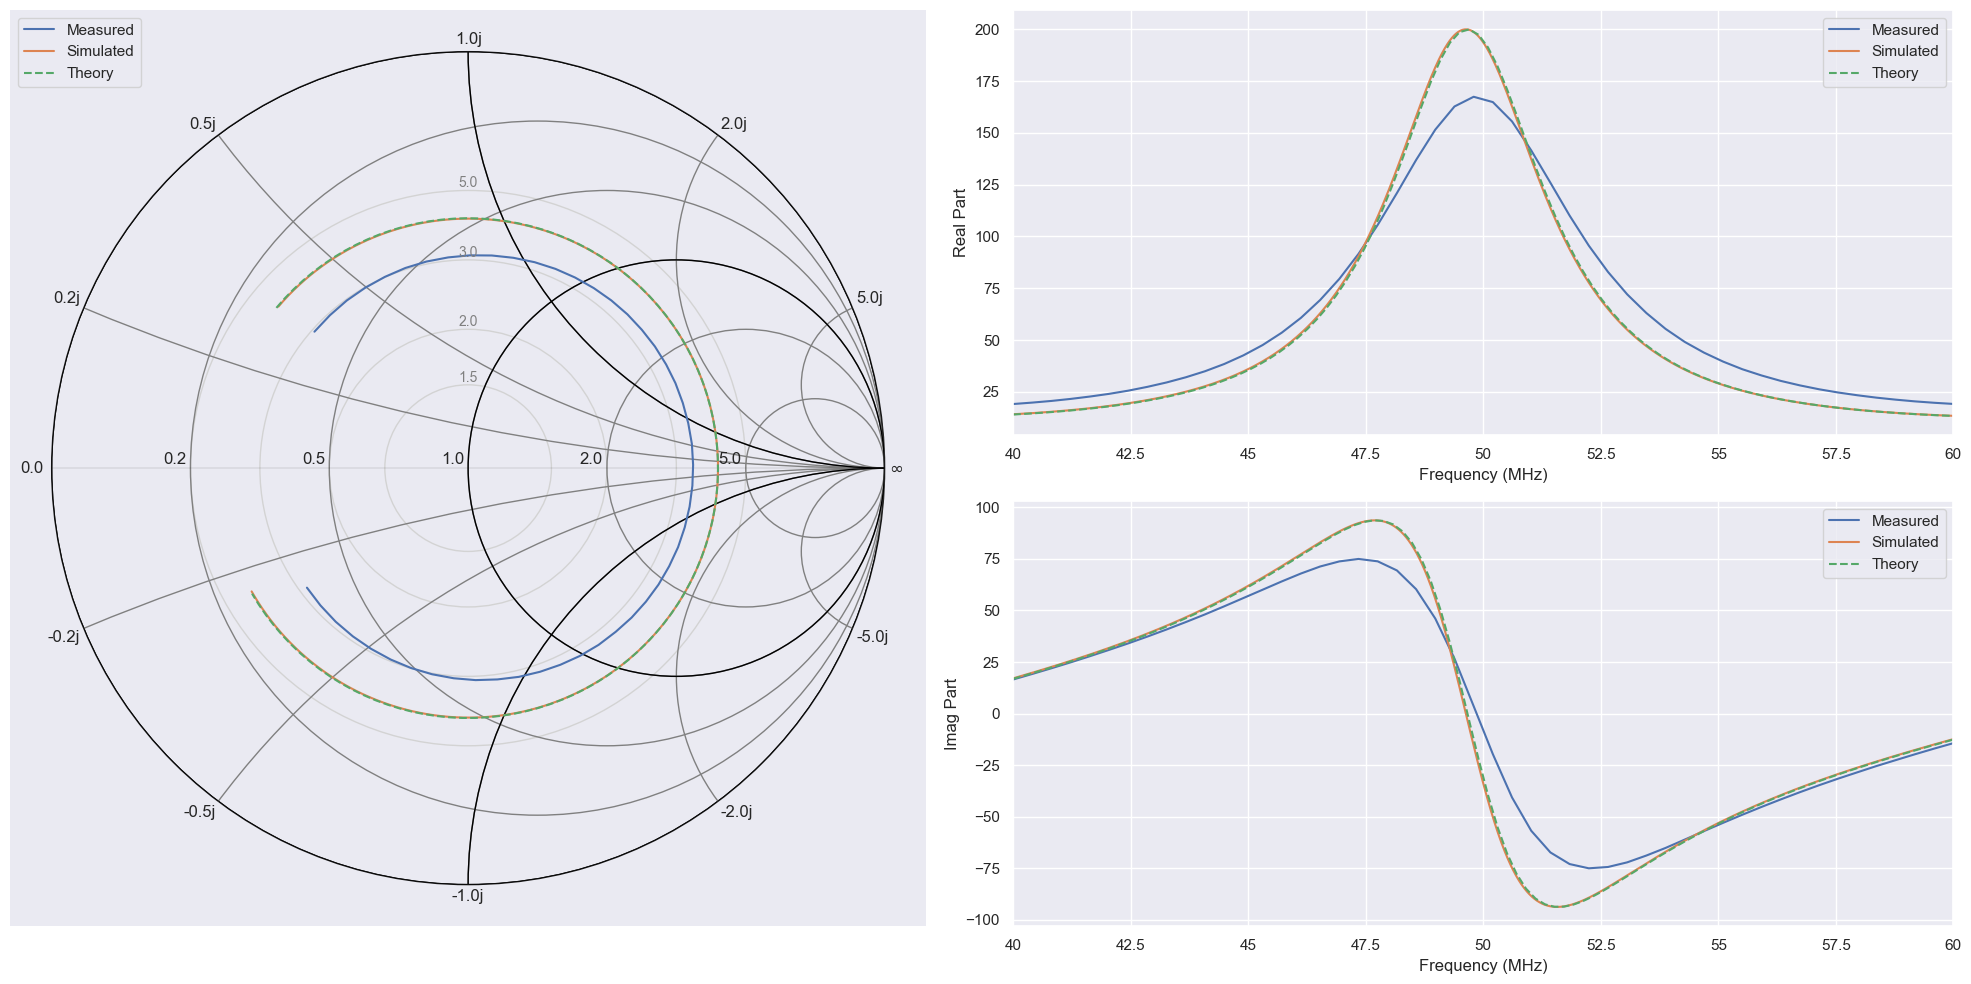

In [83]:
cable3 = rf.Network('Cable_3_data.s1p')
cable3Sim = rf.Network('sim/cabl3sim.s1p')
sns.set_theme()

gs_kw=dict(width_ratios=[1,1], height_ratios=[1,1])

fig, axs = plt.subplot_mosaic([['left', 'upper right'],
                                ['left', 'lower right']],
                               gridspec_kw=gs_kw,
                               figsize=(20,10),
                               layout="tight"
    
)

cable3.plot_s_smith( 
                r=1,
                chart_type='z',
                label='Measured',
                ax=axs['left'],
                show_legend=True,
                draw_labels=True,
                draw_vswr=True)

cable3Sim.plot_s_smith( 
                r=1,
                chart_type='z',
                label='Simulated',
                ax=axs['left'],
                show_legend=True,
                draw_labels=True,
                draw_vswr=True)

cable3Theory.plot_s_smith( 
                r=1,
                chart_type='z',
                linestyle= '--',
                label='Theory',
                ax=axs['left'],
                show_legend=True,
                draw_labels=True,
                draw_vswr=True)

cable3.plot_z_re(
                ax=axs['upper right'],
                label='Measured'
)

cable3Sim.plot_z_re(
                ax=axs['upper right'],
                label='Simulated'
)

cable3Theory.plot_z_re(
                ax=axs['upper right'],
                linestyle= '--',
                label='Theory'
)

cable3.plot_z_im(
                ax=axs['lower right'],
                label='Measured'
)

cable3Sim.plot_z_im(
                ax=axs['lower right'],
                label='Simulated'
)

cable3Theory.plot_z_im(
                ax=axs['lower right'],
                linestyle= '--',
                label='Theory'
)
plt.show()

### Calculating Dielectric Constant

In [124]:
# Calculate Dielectric constant given a Network class and cable length 
def find_Er (ntwk, l):
    
    # Determine phase difference
    dPhi = (ntwk.s_deg[0,0,0] % 360) - (ntwk.s_deg[-1,0,0] % 360)
    
    if dPhi < 0:
        dPhi = 360 + dPhi
        
    print(dPhi)
    dPhi = (dPhi * np.pi) / 180
    
    
    c = 3 * (10**8)
    
    # Substitute values into formula
    e_r = ((c * dPhi)/(4 * np.pi * l * (20 * (10**6)))) ** 2
    
    return e_r

print(find_Er (cable1, 2.964))
print(find_Er (cable2, 3.234))
print(find_Er (cable3, 3.983))
    

225.03000000000003
2.5017388162703926
241.0
2.4103026556036977
281.84000000000003
2.1732123919606137


In [80]:
import plotly.graph_objects as go

data1c = pd.read_csv("impedance_Emag_Lab3.csv")


fig = go.Figure(go.Scattersmith(imag=data1c['im(Z)']/50, real=data1c['re(Z)']/50))
fig.show()

data1c

,Freq (MHz),re(S11),im(S11),re(Z),im(Z)
0,88.000,0.73370,-0.52223,27.494,-151.972
1,88.408,0.69538,-0.57301,22.333,-136.063
2,88.816,0.65307,-0.62068,18.617,-122.760
3,89.224,0.60721,-0.66461,15.905,-111.514
4,89.633,0.55653,-0.70650,13.735,-101.536
5,90.041,0.50395,-0.74400,12.037,-93.046
6,90.449,0.44863,-0.77838,10.598,-85.547
7,90.857,0.39098,-0.80778,9.508,-78.930
8,91.265,0.33099,-0.83393,8.530,-72.959
9,91.673,0.26815,-0.85484,7.792,-67.504


In [81]:
#Quarter wave
#ZL = 3.6206  -j16.6412
#zl = 0.072 - j0.332824 @ 0.445lambda
#zd = 0.06, Zd = 3

#Zt = 12.247

import math
L = 16.6412/(2*math.pi*98*10**6*10**-9)
print(L)

wl = (3*10^8)/(98*10^6)
l1 = 0.055*wl
l2 = 0.25*wl
print(l1,l2)

fig = go.Figure(go.Scattersmith(imag=[-16.6412/50,0], real=[3.6206/50,0.06]))
fig.show()


27.02580856102907
0.0012372188139059305 0.005623721881390593
